In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f(x):
    return 3*x**2 - 2*x + 1
    
print(f(3.9))

38.83


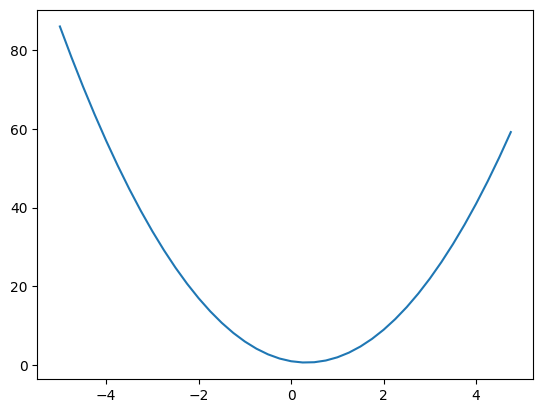

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [5]:
h = 0.0000000000001
x = 3.0
print(f(x))
print(f(x+h))
print((f(x+h) - f(x))/h)

22.0
22.0000000000016
15.987211554602254


In [6]:
a = 2.0
b = -3.0
c = 10.0

d = a*b + c
print(d)

4.0


In [7]:
h = 0.0000000000001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c
print((d2 - d1)/h)

-3.0020430585864233


In [10]:
class Value:
    def __init__(self, value, gradient=0.0, _children=(), _op=''):
        self.value = value
        self.gradient = gradient
        self._prev = set(_children)
        self._op = _op

    def __add__(self, other):
        if not isinstance(other, Value):
            raise TypeError("Operands must be instances of Value")
        return Value(self.value + other.value, self.gradient + other.gradient, (self, other), '+')

    def __mul__(self, other):
        if not isinstance(other, Value):
            raise TypeError("Operands must be instances of Value")
        return Value(self.value * other.value, self.value * other.gradient + self.gradient * other.value, (self, other), '*')

    def __repr__(self):
        return f"Value(value={self.value}, gradient={self.gradient}, op={self._op}, children={len(self._prev)})"

In [20]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c
print(d)

print(d._prev)
print(d._op)

Value(value=4.0, gradient=0.0, op=+, children=2)
{Value(value=-6.0, gradient=0.0, op=*, children=2), Value(value=10.0, gradient=0.0, op=, children=0)}
+


In [34]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    
    nodes, edges = trace(root)
    
    for n in nodes: 
        uid = str(id(n))
        dot.node(name=uid, label=n._op)  # Use uid as the node identifier
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)))  # Create edge from n1 to n2
    
    return dot

# Assuming 'd' is your root node
draw_dot(d)


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH